# Pregunta 1
---
### Cuando ejecuta run en simulink , indique que grafica se ve en el scope
![ejercicio1-1.png](../images/ejercicio1-1.png)

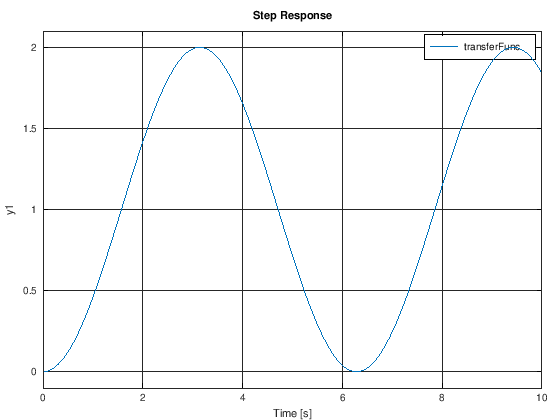

In [1]:
pkg load control
s = tf('s');
% Función transferencia
transferFunc = 1/(s^2+1);
% Gráfica de respuesta al escalón
step (transferFunc)


La respuesta correcta es la C.

# Pregunta 2
---
### Un circuito R L serie , ambos unitarios , es excitado por un escalón de tensión unitario. Se sabe que en 0+ la corriente es yo. El modelo eléctrico es descripto por la ecuación diferencial mostrada donde y(t) es la corriente
$$ \dot{y(t)} + y(t) = 1 (t), \quad \quad  y(0+) = y_0 $$

### Indique que $y(t)$ resuelve la ecuación diferencial:

1. [ ] $y(t) = 1 + (y_0 + 1) \cdot \exp(-t)$
2. [x] $y(t) = 1 + (y_0 - 1) \cdot \exp(-t)$
3. [ ] $y(t) = (y_0 - 1) \cdot \exp(-t)$
4. [ ] $y(t) = (y_0 + 1) \cdot \exp(-t)$

Para resolver este problema se puede aplicar Laplace, despejar $Y(s)$ y luego antitransformar. 
1. Aplico Laplace:
    $$ \mathcal{L} \left\{ \dot{y(t)} + y(t) = 1 (t) \right\}$$
    $$ s \cdot Y(s) - y_0 + Y(s) = \frac{1}{s} $$    

2. Despejo $Y(s)$:
    $$ Y(s) \cdot (s + 1) = \frac{1}{s} + y_0 $$
    $$ Y(s) = \frac{1/s + y_0}{s + 1} $$
    $$ Y(s) = \frac{1}{s^2 + s} + \frac{y_0}{s + 1} $$

3. Antitransformo por residuos:

- Llamo $Y1(s) = \frac{1}{s^2 + s} = \frac{1}{s \cdot (s+1)}$
    $$ \left. Res \, Y1(s) \right|_{s=0} = \lim\limits_{s \to 0} \frac{1 \cdot s}{s \cdot (s+1)} = 1$$
    $$ \left. Res \, Y1(s) \right|_{s=1} = \lim\limits_{s \to -1} \frac{1 \cdot (s+1)}{s \cdot (s+1)} = -1$$
    - Luego la antitransformada es:
    $$ y1(t) = 1 \cdot \exp(0t) + (-)1 \cdot \exp(-1t) = 1 - \exp (-t) $$
- Llamo $Y2(s) = \frac{y_0}{s+1}$:
    - La antitransformada de Y2(s) es:
    $$ y2(t) = y_0 \cdot \exp(-t) $$    

4. Luego el resultado es la suma de y1(t) + y2(t):
    $$ y(t) = 1 - \exp(-t) + y_0 \cdot \exp(-t) = $$
    $$ y(t) = 1 + (y_0 - 1) \cdot \exp(-t) $$

Por lo tanto la respuesta correcta es la opción 2
> _Nota: Luego de escribir todo me di cuenta que podría resolver directamente la ecuación $Y(s) = \frac{1 + y_0 \cdot s}{s \cdot (s+1)}$ por residuos, es más directo._
---
### Abajo una comprobación en Octave.

In [2]:
pkg load symbolic

syms s;
%elijo un valor de y0 al azar
y0 = 33;

Y1 = 1/(s^2+s);
Y2 = y0/(s+1);
Y = Y1 + Y2;
y1 = simplify(ilaplace(Y1))
y2 = simplify(ilaplace(Y2))
y = simplify(ilaplace(Y))

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.1.
y1 = (sym)

       -t
  1 - ℯ  

y2 = (sym)

      -t
  33⋅ℯ  

y = (sym)

          -t
  1 + 32⋅ℯ  



# Ejercicio 3
---
### Cuando se ejecuta run en simulink, indique que grafica se obseva en el scope:
![ejercicio1-3.png](../images/ejercicio1-3.png)

Este ejercicio es igual que el punto 1. Para resolverlo manual se debe hacer la antitransformada de la función escalón (step) multiplicada por la función transferencia.

Queda así:
    $$ Y(s) = \frac{1}{s \cdot (s^2-2s+2)} = $$

1. Escribo la función como producto de polos y ceros:

    $$ Y(s) = \frac{1}{ s \cdot (s - p1) \cdot (s - p2)} =$$
donde p1 y p2 son los polos de 1er orden que debo encontrar

2. Encuentro las raíces del polinomio de 2do orden para resolver por residuos:
> _Recordatorio: Para resolver la cuadrática se utiliza la fórmula $\frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$, donde $a \cdot s^2 + b \cdot s + c = 0$._

3. El resultado es:
    $$ Y(s) = \frac{1}{s \cdot (s-p1) \cdot (s-p2)} $$
donde $p1 = 1+i$ y $p2 = 1-i$.

4. Resuelvo por residuos:
- Polo $s = 0$. 
    $$ \left. Res \, Y(s) \right|_{s=0} = \lim\limits_{s \to 0} \frac{1 \cdot s}{s \cdot (s^2-2s+2)} = \frac{1}{2}$$    

- Polo $s = 1+i$. 
$$ \left. Res \, Y(s) \right|_{s=p1} = \lim\limits_{s \to p1} \frac{1 \cdot (s-p1)}{s \cdot (s-p1) \cdot (s-p2))} = $$

$$ \frac{1}{1+i \cdot (1+i-(1-i)))} = \frac{1}{-2+2i} = $$

$$ = ...... = \frac{-1-i}{4} $$

- Polo $s = 1-i$.
$$ \left. Res \, Y(s) \right|_{s=p2} = \lim\limits_{s \to p2} \frac{1 \cdot (s-p2)}{s \cdot (s-p1) \cdot (s-p2))} = $$

$$ \frac{1}{1-i \cdot (1-i-(1+i)))} = \frac{1}{-2-2i} = $$

$$ = ..... = \frac{-1+i}{4} $$

4.Antitransformada:
    $$ \frac{1}{2} + \frac{-1}{4} \cdot \left\{ (-1-i) \cdot e^{(-1-i)t} + (-1+i) \cdot e^{(-1+i)t} \right\}= $$

Despejando y agrupando se llega a esta expresión:

$$ y (t) = \frac{1}{2} + \frac{-1}{2} \, e^t \, \left[ \cos(t) - \sin(t) \right]= $$

que equivale a (también se puede obtener de la ecuación anterior):

$$ y(t) = \frac{1}{2} + \frac{-\sqrt{2}}{2} \, e^t \, \cos(t + \frac{\pi}{4})= $$

Luego para verificar el resultado calculo algunos puntos con la calculadora y grafico:

| t | y(t) |
|---|------|
| 0 | -0,2 |
| 2 |  7,4 |
| 4 | -3,5 |
| 6 | -353 |
| 7 | -74  |
| 8 | 2392 |
| 10| 4595 |

```La respuesta correcta es la d.```

---
### Abajo se corrobora con Octave
---

In [33]:
pkg load control symbolic
% Calculo simbolico para verificar las cuentas
syms s;
Y = 1/(s*(s^2-2*s+2));
y = simplify(ilaplace(Y))

% Obtención del grafico para constatar respuesta
s = tf('s');
% Función transferencia
transferFunc = 1/(s^2-2*s+2);
% Gráfica de respuesta al escalón
[y1,t,X]=step (transferFunc,10);

y = (sym)

        t    ⎛    π⎞    
    √2⋅ℯ ⋅cos⎜t + ─⎟    
             ⎝    4⎠   1
  - ──────────────── + ─
           2           2



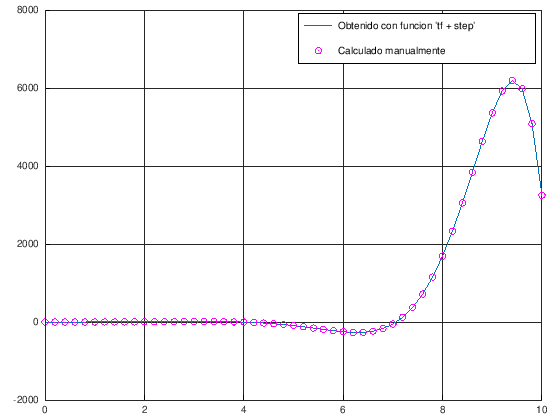

In [34]:
%Grafico junto a mi resultado para comparar
y2 = 0.5.*(1-(e.^t).*(cos(t)-sin(t))); %Resultado obtenido por metodo de los residuos
hold on
plot(t,y1)
plot(t,y2,"om")
legend("Obtenido con funcion 'tf + step' ","Calculado manualmente")
grid
hold off

In [27]:
help plot

'plot' is a function from the file /usr/share/octave/4.2.2/m/plot/draw/plot.m

 -- plot (Y)
 -- plot (X, Y)
 -- plot (X, Y, FMT)
 -- plot (..., PROPERTY, VALUE, ...)
 -- plot (X1, Y1, ..., XN, YN)
 -- plot (HAX, ...)
 -- H = plot (...)
     Produce 2-D plots.

     Many different combinations of arguments are possible.  The
     simplest form is

          plot (Y)

     where the argument is taken as the set of Y coordinates and the X
     coordinates are taken to be the range '1:numel (Y)'.

     If more than one argument is given, they are interpreted as

          plot (Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, PROPERTY, VALUE, ...)

     or

          plot (X, Y, FMT, ...)

     and so on.  Any number of argument sets may appear.  The X and Y
     values are interpreted as follows:

        * If a single data argument is supplied, it is taken as the set
          of Y coordinates and the X coordinates are taken to be the
          indices of the elements, starting w